In [1]:
## Essential libraries for manipulating data
import numpy as np
import pandas as pd


## Some plotting libraries
### matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
### seaborn - can be used to make prettier visualisations
import seaborn as sns 
sns.set_palette('Set2')
### plotly - can be used to create interactive visualisations
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

### For more fancy interactive visualisations
## Widget libraries
from ipywidgets import widgets
from ipywidgets import interact, interact_manual


init_notebook_mode(connected=True)

## Some additional libraries
# Do not print out warnings
import warnings
warnings.filterwarnings('ignore')
# Library for os functions, e.g. listing directory iems
import os



## The dataset

The dataset contains the SDG indicators and was obtained from the [United Nations Global SDG Database](https://unstats.un.org/sdgs/indicators/database/).

In [21]:
fn = "data/SDGs.csv"
df = pd.read_csv(fn)
df.head()


Goal Target Indicator   SeriesCode  \
0     1    1.1     1.1.1  SI_POV_DAY1   
1     1    1.1     1.1.1  SI_POV_DAY1   
2     1    1.1     1.1.1  SI_POV_DAY1   
3     1    1.1     1.1.1  SI_POV_DAY1   
4     1    1.1     1.1.1  SI_POV_DAY1   

                                   SeriesDescription  GeoAreaCode GeoAreaName  \
0  Proportion of population below international p...            1       World   
1  Proportion of population below international p...            1       World   
2  Proportion of population below international p...            1       World   
3  Proportion of population below international p...            1       World   
4  Proportion of population below international p...            1       World   

   TimePeriod Value Time_Detail            ...             \
0        2002    26        2002            ...              
1        2005    21        2005            ...              
2        2008    18        2008            ...              
3        2010    16        2010            ...              
4        2011    14        2011            ...              

   [Policy instruments]  [Quantile]  [Reporting Type] [Sampling Stations]  \
0                   NaN         NaN                 G                 NaN   
1                   NaN         NaN                 G                 NaN   
2                   NaN         NaN                 G                 NaN   
3                   NaN         NaN                 G                 NaN   
4                   NaN         NaN                 G                 NaN   

  [Sex] [Type of occupation] [Type of product]  [Type of skill]  \
0   NaN                  NaN               NaN              NaN   
1   NaN                  NaN               NaN              NaN   
2   NaN                  NaN               NaN              NaN   
3   NaN                  NaN               NaN              NaN   
4   NaN                  NaN               NaN              NaN   

  [Type of speed] [Type of waste treatment]  
0             NaN                       NaN  
1             NaN                       NaN  
2             NaN                       NaN  
3             NaN                       NaN  
4             NaN                       NaN  

[5 rows x 40 columns]

In [22]:
df.head()

Goal Target Indicator   SeriesCode  \
0     1    1.1     1.1.1  SI_POV_DAY1   
1     1    1.1     1.1.1  SI_POV_DAY1   
2     1    1.1     1.1.1  SI_POV_DAY1   
3     1    1.1     1.1.1  SI_POV_DAY1   
4     1    1.1     1.1.1  SI_POV_DAY1   

                                   SeriesDescription  GeoAreaCode GeoAreaName  \
0  Proportion of population below international p...            1       World   
1  Proportion of population below international p...            1       World   
2  Proportion of population below international p...            1       World   
3  Proportion of population below international p...            1       World   
4  Proportion of population below international p...            1       World   

   TimePeriod Value Time_Detail            ...             \
0        2002    26        2002            ...              
1        2005    21        2005            ...              
2        2008    18        2008            ...              
3        2010    16        2010            ...              
4        2011    14        2011            ...              

   [Policy instruments]  [Quantile]  [Reporting Type] [Sampling Stations]  \
0                   NaN         NaN                 G                 NaN   
1                   NaN         NaN                 G                 NaN   
2                   NaN         NaN                 G                 NaN   
3                   NaN         NaN                 G                 NaN   
4                   NaN         NaN                 G                 NaN   

  [Sex] [Type of occupation] [Type of product]  [Type of skill]  \
0   NaN                  NaN               NaN              NaN   
1   NaN                  NaN               NaN              NaN   
2   NaN                  NaN               NaN              NaN   
3   NaN                  NaN               NaN              NaN   
4   NaN                  NaN               NaN              NaN   

  [Type of speed] [Type of waste treatment]  
0             NaN                       NaN  
1             NaN                       NaN  
2             NaN                       NaN  
3             NaN                       NaN  
4             NaN                       NaN  

[5 rows x 40 columns]

In [23]:
print('Dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.dtypes


Dataset has 1174682 rows and 40 columns


Goal                                     int64
Target                                  object
Indicator                               object
SeriesCode                              object
SeriesDescription                       object
GeoAreaCode                              int64
GeoAreaName                             object
TimePeriod                               int64
Value                                   object
Time_Detail                             object
 UpperBound                            float64
 LowerBound                            float64
 BasePeriod                            float64
 Source                                 object
FootNote                                object
Nature                                  object
Units                                   object
[Activity]                             float64
[Age]                                   object
[Cities]                                object
[Disability status]                     object
[Education le

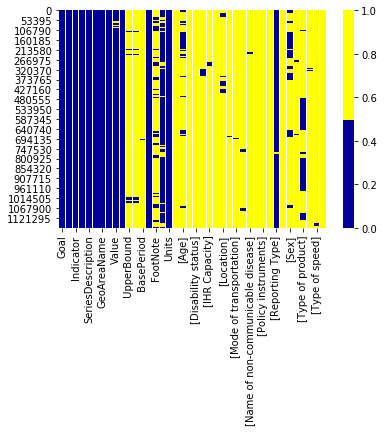

In [24]:
#Use heatmap to display missing values
cols = df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [25]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Goal - 0.0%
Target - 0.0%
Indicator - 0.0%
SeriesCode - 0.0%
SeriesDescription - 0.0%
GeoAreaCode - 0.0%
GeoAreaName - 0.0%
TimePeriod - 0.0%
Value - 2.0%
Time_Detail - 0.0%
 UpperBound - 97.0%
 LowerBound - 97.0%
 BasePeriod - 100.0%
 Source - 0.0%
FootNote - 79.0%
Nature - 12.0%
Units - 0.0%
[Activity] - 100.0%
[Age] - 85.0%
[Cities] - 100.0%
[Disability status] - 100.0%
[Education level] - 97.0%
[IHR Capacity] - 98.0%
[Level/Status] - 100.0%
[Location] - 94.0%
[Migratory status] - 99.0%
[Mode of transportation] - 100.0%
[Name of international institution] - 97.0%
[Name of non-communicable disease] - 99.0%
[Policy Domains] - 100.0%
[Policy instruments] - 100.0%
[Quantile] - 100.0%
[Reporting Type] - 1.0%
[Sampling Stations] - 100.0%
[Sex] - 78.0%
[Type of occupation] - 99.0%
[Type of product] - 66.0%
[Type of skill] - 99.0%
[Type of speed] - 99.0%
[Type of waste treatment] - 100.0%


created missing indicator for:  UpperBound, proportion missing: 0.9668420900294719, 1135732/1174682
created missing indicator for:  LowerBound, proportion missing: 0.9668369822641362, 1135726/1174682
created missing indicator for:  BasePeriod, proportion missing: 0.9951680539924848, 1169006/1174682
created missing indicator for: [Activity], proportion missing: 1.0, 1174682/1174682
created missing indicator for: [Cities], proportion missing: 0.9997778122078996, 1174421/1174682
created missing indicator for: [Disability status], proportion missing: 0.9990346323515641, 1173548/1174682
created missing indicator for: [Education level], proportion missing: 0.9680696562984705, 1137174/1174682
created missing indicator for: [IHR Capacity], proportion missing: 0.9829077145985041, 1154604/1174682
created missing indicator for: [Level/Status], proportion missing: 0.9997514220869989, 1174390/1174682
created missing indicator for: [Location], proportion missing: 0.9404145121828716, 1104688/1174682


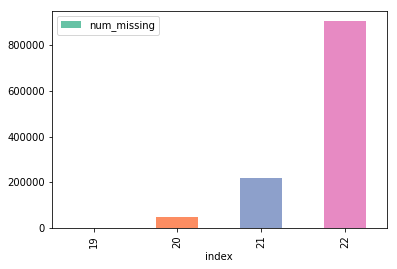

In [26]:
#Can visualise using barchart
column_missing_count = {}
threshold = int(len(df)*(0.9))
missingcols = []
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    column_missing_count[col] = num_missing
    
    if num_missing > threshold:  
        print('created missing indicator for: {}, proportion missing: {}, {}/{}'.format(col, num_missing/len(df), num_missing, len(df)))
        df['{}_ismissing'.format(col)] = missing
        missingcols.append(col)


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]

df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [27]:
#maxcol = max(column_missing_count, key=column_missing_count.get)
#print(maxcol)
#cols_to_drop = [maxcol]

cols_to_drop = missingcols
df_less = df.drop(missingcols, axis=1)


In [32]:
df_less = df_less.drop(ismissing_cols, axis=1)
df_less.shape
#print('Dataset with has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

(1174682, 19)

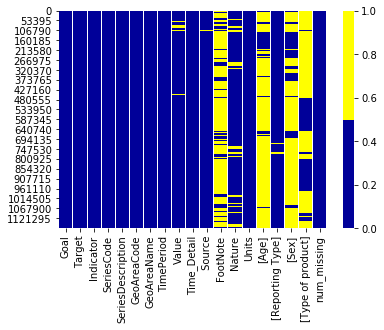

In [33]:
cols = df_less.columns
cols
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_less[cols].isnull(), cmap=sns.color_palette(colours))

In [35]:
df_less.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       ' Source', 'FootNote', 'Nature', 'Units', '[Age]', '[Reporting Type]',
       '[Sex]', '[Type of product]', 'num_missing'],
      dtype='object')

In [37]:
wantedcolumns = ['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       ' Source', 'Nature', 'Units']
df = df[wantedcolumns]

In [38]:
df.head()

Goal Target Indicator   SeriesCode  \
0     1    1.1     1.1.1  SI_POV_DAY1   
1     1    1.1     1.1.1  SI_POV_DAY1   
2     1    1.1     1.1.1  SI_POV_DAY1   
3     1    1.1     1.1.1  SI_POV_DAY1   
4     1    1.1     1.1.1  SI_POV_DAY1   

                                   SeriesDescription  GeoAreaCode GeoAreaName  \
0  Proportion of population below international p...            1       World   
1  Proportion of population below international p...            1       World   
2  Proportion of population below international p...            1       World   
3  Proportion of population below international p...            1       World   
4  Proportion of population below international p...            1       World   

   TimePeriod Value Time_Detail  \
0        2002    26        2002   
1        2005    21        2005   
2        2008    18        2008   
3        2010    16        2010   
4        2011    14        2011   

                                              Source Nature    Units  
0  World Development Indicators database, World Bank      G  PERCENT  
1  World Development Indicators database, World Bank      G  PERCENT  
2  World Development Indicators database, World Bank      G  PERCENT  
3  World Development Indicators database, World Bank      G  PERCENT  
4  World Development Indicators database, World Bank      G  PERCENT

In [84]:
indicators = list(df['SeriesDescription'].unique())
indicators.insert(0, 'ALL')
years = sorted(df['TimePeriod'].unique())
years.insert(0, 'ALL')
locations = sorted(df['GeoAreaName'].unique())
locations.insert(0, 'ALL')


In [86]:
@interact
def indicatorYearValues(indicator=indicators, year=years, location=locations, x=widgets.IntSlider(min=1, max=len(df), step=1, value=5)):
    ndf = df
    if indicator!='ALL':
        ndf = ndf[ndf['SeriesDescription']==indicator]
    if year!='ALL':
        ndf = ndf[ndf['TimePeriod']==year]
    if location!='ALL':
        ndf = ndf[ndf['GeoAreaName']==location]
    
    return ndf[0:x]
    


interactive(children=(Dropdown(description='indicator', options=('ALL', 'Proportion of population below intern…

In [ ]:
## Widget to display graph
style = {'description_width': 'initial'}
indfields = list(df['SeriesDescription'].unique())
locfields = list(df['GeoAreaName'].unique())
locfields.insert(0, 'ALL')


indtimefield = widgets.Dropdown(
    description='Indicator: ',
    value=indfields[0],
    style=style,
    options=indfields
)

loctimefield = widgets.Dropdown(
    description='Geo Area: ',
    value=locfields[0],
    style=style,
    options=locfields
)


indtimecontainer = widgets.HBox(children=[indtimefield, loctimefield])

def response(change):
    it = indtimefield.value
    geo = loctimefield.value
    
    filtered = indicatorYearValues(indicator=it, year='ALL', location=geo, x=-1)
    
    if(len(filtered)==0):
        print('No Results')
        return
    
    locs = list(filtered['GeoAreaName'].unique())


    # Use the hovertext kw argument for hover text
    data = []

    for loc in locs:
        f = filtered[filtered['GeoAreaName']==loc]
        x = f['TimePeriod']
        y = f['Value']
    
        data.append(go.Scatter(x=x, y=y, name=loc))

    layout = dict(
        title=it
    )    
        
    fig = go.Figure(data=data, layout=layout)
    fn = 'figures/' + it + '_TimeLine.png'
    
    fig.write_image(fn)
    print('Written: {}'.format(fn))
    fig.show()
    
    
indtimefield.observe(response, names="value")
loctimefield.observe(response, names="value")

ind_time = widgets.VBox([indtimecontainer])
ind_time


In [109]:
df.columns
#df[' Source'].value_counts()
print('These data come from {} sources'.format(len(df[' Source'].unique())))
print('There are {} goals'.format(len(df['Goal'].unique())))
print('There are {} targets'.format(len(df['Target'].unique())))
print('There are {} indicators'.format(len(df['Indicator'].unique())))
print('There are {} sub-indicators (series code)'.format(len(df['SeriesCode'].unique())))
print('There are {} sub-indicators (series description)'.format(len(df['SeriesDescription'].unique())))
print('There are {} locations (code)'.format(len(df['GeoAreaCode'].unique())))
print('There are {} locations (name)'.format(len(df['GeoAreaName'].unique())))
print('There are {} values'.format(len(df['Value'].unique())))
print('There are {} units'.format(len(df['Units'].unique())))
print('There are {} years'.format(len(df['TimePeriod'].unique())))

These data come from 9514 sources
There are 17 goals
There are 155 targets
There are 189 indicators
There are 436 sub-indicators (series code)
There are 436 sub-indicators (series description)
There are 309 locations (code)
There are 309 locations (name)
There are 444100 values
There are 43 units
There are 21 years


In [120]:
countrydata = pd.pivot_table(df, index=['TimePeriod', 'Goal', 'Target', 'Indicator', 'SeriesDescription'], 
                             columns=['GeoAreaName'],
                     aggfunc={'Value': [lambda x: len(x.dropna().unique())]})